# TD6: Bistability in MAPK double-phosphorylation levels
- reaction system from BioModels http://biomodels.org
- positive circuit in the influence graph
- bistability revealed by bifurcation diagram
- question on a single phosphorylation-dephosphorylation loop
- question on Michaelis-Menten reduction

F. Fages, S. Soliman, 26 Jan 2017

# Journal of Cell Biology, Feb. 2004

![Kholodenko](bistability_header.jpg)

![figure](bistability_figure.jpg)

In [1]:
load('library:biomodels/BIOMD0000000027.xml').
list_model.

k1cat*MAPKK*M/Km1/ (1+M/Km1+Mp/Km2)for M=[MAPKK]=>Mp.
k2cat*MAPKK*Mp/Km2/ (1+M/Km1+Mp/Km2)for Mp=[MAPKK+M]=>Mpp.
k3cat*MKP3*Mpp/Km3/ (1+Mpp/Km3+Mp/Km4+M/Km5)for Mpp=[MKP3+M]=>Mp.
k4cat*MKP3*Mp/Km4/ (1+Mpp/Km3+Mp/Km4+M/Km5)for Mp=[MKP3+Mpp]=>M.
present(M,500.0).
present(Mp,0.0).
present(Mpp,0.0).
present(MAPKK,50.0).
present(MKP3,100.0).
parameter(
  uVol = 1.0,
  k1cat = 0.01,
  Km1 = 50.0,
  k2cat = 15.0,
  Km2 = 500.0,
  k3cat = 0.084,
  Km3 = 22.0,
  k4cat = 0.06,
  Km4 = 18.0,
  Km5 = 78.0
).


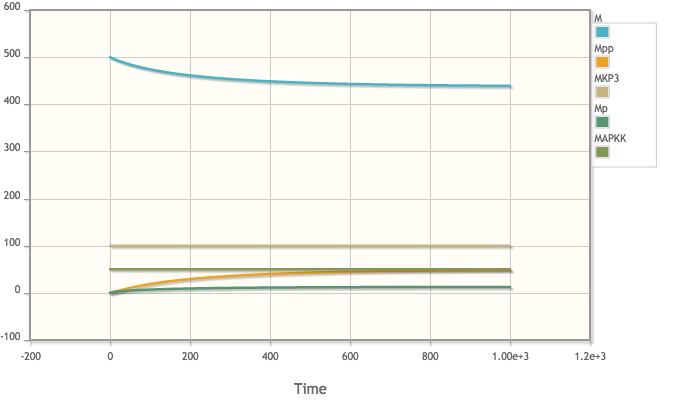

In [2]:
option(time: 1000).
numerical_simulation. plot.

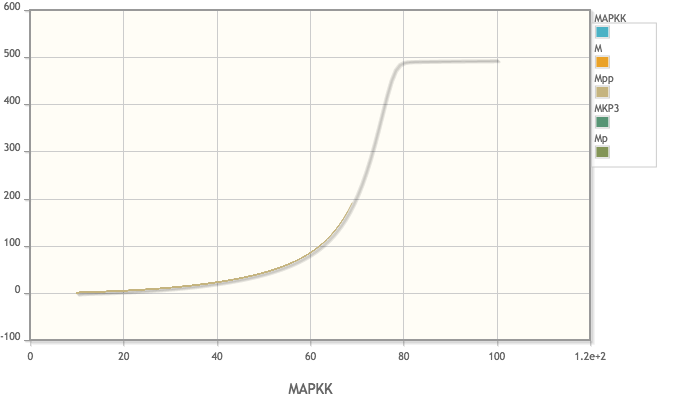

In [3]:
option(show: Mpp).
dose_response(MAPKK, 10, 100).

# Warning:
dose_response diagrams are currently computed in Biocham by simulation, with a slow variation of the input over ten times the time horizon. The steady state is not computed symbolically, but assumed to be reached over that time horizon for all values of the input.

This is not verified here for high values of MAPKK and a longer time horizon is required.

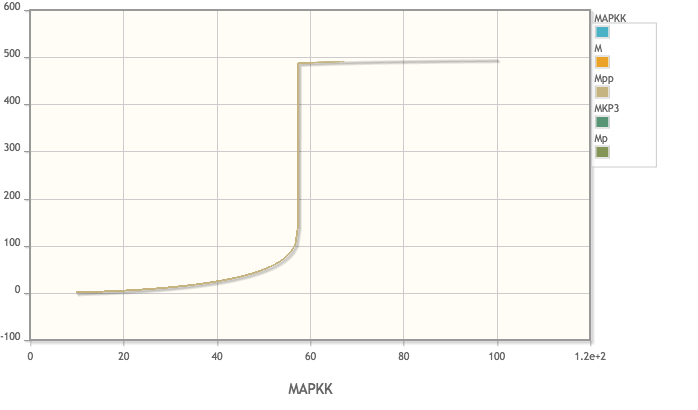

In [4]:
option(time: 10000000).
dose_response(MAPKK, 10, 100).

Pseudo-bifurcation diagrams are computed similarly by simulation, by varying the input forward and backward.

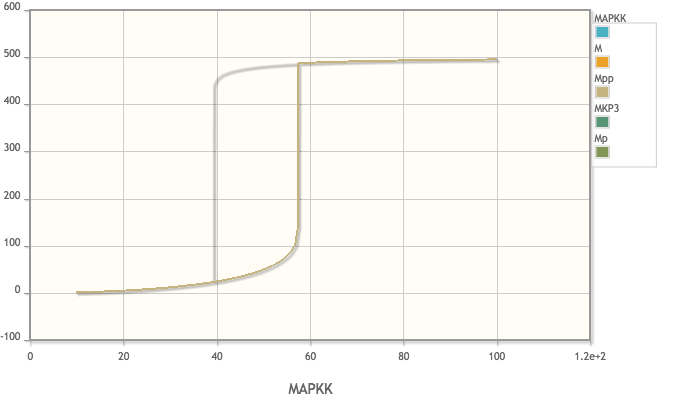

In [5]:
bifurcations(MAPKK, 10, 100).

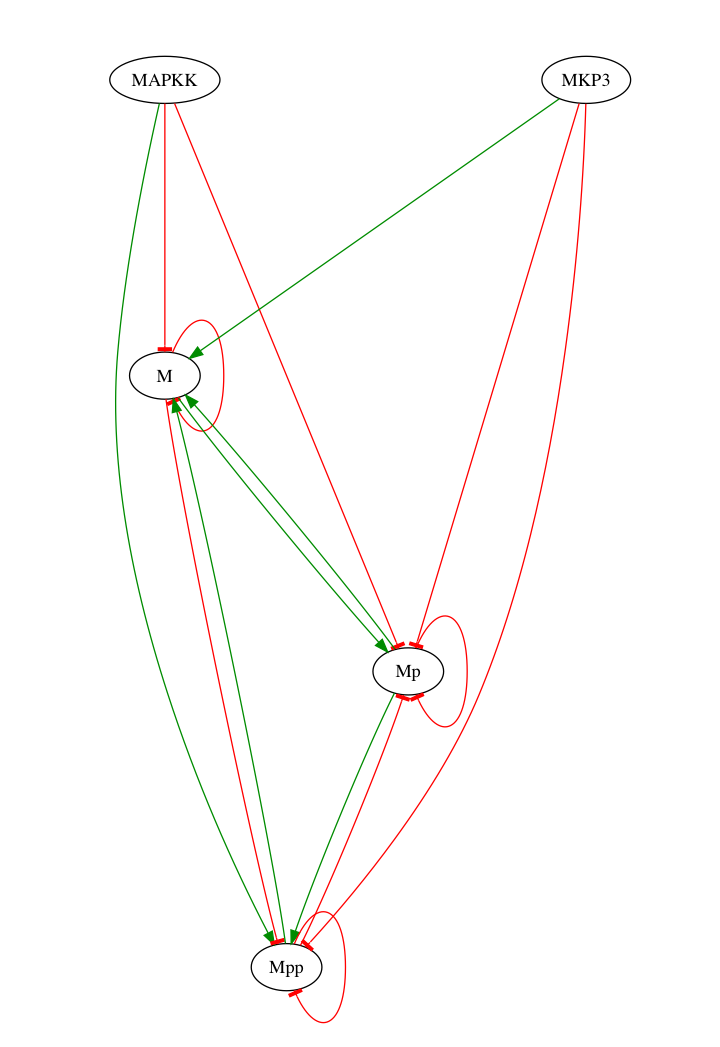

In [6]:
draw_influences.

The existence of a positive circuit in the **influence graph** of a reaction system is René Thomas's necessary condition for multistationarity.

This condition is trivially satisfied when there is a complexation reaction, but it has been refined to exclude circuits involving inverse reactions and other conditions by

*Sylvain Soliman. **A stronger necessary condition for the multistationarity of chemical reaction networks**. Bulletin of Mathematical Biology, 75(11):2289--2303, November 2013.*

# Questions
1. does multistability arise on the first phosphorylation Mp ?
2. does multistability arise in absence of the second phosphorylation reactions ? (try by setting kinetic parameters to 0)